# Overview
This file has the Python code to retrieve and analyze the data about access to sanitation facilities. It is divided in the following sections:
- *Setup*: to load libraries and define global variables.
- *Getting data from API*: which shows different attempts to retrieve and parse the data. In subsection *Pulling all data from API*, the complete dataset is downloaded and exported to a pickle file.
- *EDA*: To know the dataset based on Exploratory and Descriptive analysis.
- *Cleaning*: to preprocess variables that had different formats.
- *Analysis*: to filter the dataset with only the information of interest (income group and region) and plot it.
- *Conclusions*: conclusions based on the visualizations made.

*Note:* Running the whole script may take some time (~ 2 minutes) because it downloads all the information from the World Bank API. If you want to run it quickly, you can use the file *sanitation_df.pkl* which already have the data downloaded. In the section *EDA* you can find the piece of code that imports this file.

# Setup

## Loading libraries

In [50]:
import requests # To get data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Setting global variables
According to the documentation, the URL to retrieve the data from the World Bank API is the following:

In [51]:
WB_URL = 'http://api.worldbank.org/v2/country/all/indicator/SH.STA.BASS.ZS'

# Getting data from the API

## Retrieving data

### 1st try: data returned in XML format

In [52]:
response = requests.get(WB_URL)
response.text

'ï»¿<?xml version="1.0" encoding="utf-8"?>\r\n<wb:data page="1" pages="330" per_page="50" total="16492" sourceid="2" sourcename="World Development Indicators" lastupdated="2023-03-30" xmlns:wb="http://www.worldbank.org">\r\n  <wb:data>\r\n    <wb:indicator id="SH.STA.BASS.ZS">People using at least basic sanitation services (% of population)</wb:indicator>\r\n    <wb:country id="ZH">Africa Eastern and Southern</wb:country>\r\n    <wb:countryiso3code>AFE</wb:countryiso3code>\r\n    <wb:date>2021</wb:date>\r\n    <wb:value />\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="SH.STA.BASS.ZS">People using at least basic sanitation services (% of population)</wb:indicator>\r\n    <wb:country id="ZH">Africa Eastern and Southern</wb:country>\r\n    <wb:countryiso3code>AFE</wb:countryiso3code>\r\n    <wb:date>2020</wb:date>\r\n    <wb:value>30.8359427084217</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\

### 2nd try: data returned in JSON format
According to the [documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures), the data can be returned in JSON format. 

In [53]:
response = requests.get(WB_URL+'?format=json')
response.text

'[{"page":1,"pages":330,"per_page":50,"total":16492,"sourceid":"2","sourcename":"World Development Indicators","lastupdated":"2023-03-30"},[{"indicator":{"id":"SH.STA.BASS.ZS","value":"People using at least basic sanitation services (% of population)"},"country":{"id":"ZH","value":"Africa Eastern and Southern"},"countryiso3code":"AFE","date":"2021","value":null,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SH.STA.BASS.ZS","value":"People using at least basic sanitation services (% of population)"},"country":{"id":"ZH","value":"Africa Eastern and Southern"},"countryiso3code":"AFE","date":"2020","value":30.8359427084217,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SH.STA.BASS.ZS","value":"People using at least basic sanitation services (% of population)"},"country":{"id":"ZH","value":"Africa Eastern and Southern"},"countryiso3code":"AFE","date":"2019","value":30.6558737186025,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SH.STA.BASS.ZS","value":"Pe

In [54]:
# Get json content
data = response.json()
data

[{'page': 1,
  'pages': 330,
  'per_page': 50,
  'total': 16492,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2023-03-30'},
 [{'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2021',
   'value': None,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2020',
   'value': 30.8359427084217,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'coun

### 3rd try: getting data from 1960
According to the [documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures), requests support year-to-date values (YTD) and we are interested in pulling data from 1960

In [55]:
response = requests.get(WB_URL+'?format=json&YTD:1960')
# Get json content
data = response.json()
data

[{'page': 1,
  'pages': 330,
  'per_page': 50,
  'total': 16492,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2023-03-30'},
 [{'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2021',
   'value': None,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2020',
   'value': 30.8359427084217,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'coun

### 4th try: getting data from different pages
According to API's response, there are 330 pages. We are interested in retrieving all of them.

In [56]:
response = requests.get(WB_URL+'?format=json&YTD:1960&page=200')
# Get json content
data = response.json()
data

[{'page': 200,
  'pages': 330,
  'per_page': 50,
  'total': 16492,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2023-03-30'},
 [{'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'LS', 'value': 'Lesotho'},
   'countryiso3code': 'LSO',
   'date': '1991',
   'value': None,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'LS', 'value': 'Lesotho'},
   'countryiso3code': 'LSO',
   'date': '1990',
   'value': None,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SH.STA.BASS.ZS',
    'value': 'People using at least basic sanitation services (% of population)'},
   'country': {'id': 'LS', 'value': 'Lesotho'},
   'countryiso3code': 'LSO',
   'date': '1989',
   'value': None,
   'unit': '

## Parsing data into a dataframe

### 1st try: Using DataFrame
The data is not parsed as expected

In [57]:
data_df = pd.DataFrame(data[1])
data_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.STA.BASS.ZS', 'value': 'People usin...","{'id': 'LS', 'value': 'Lesotho'}",LSO,1991,NaN,,,0
1,"{'id': 'SH.STA.BASS.ZS', 'value': 'People usin...","{'id': 'LS', 'value': 'Lesotho'}",LSO,1990,NaN,,,0
2,"{'id': 'SH.STA.BASS.ZS', 'value': 'People usin...","{'id': 'LS', 'value': 'Lesotho'}",LSO,1989,NaN,,,0
3,"{'id': 'SH.STA.BASS.ZS', 'value': 'People usin...","{'id': 'LS', 'value': 'Lesotho'}",LSO,1988,NaN,,,0
4,"{'id': 'SH.STA.BASS.ZS', 'value': 'People usin...","{'id': 'LS', 'value': 'Lesotho'}",LSO,1987,NaN,,,0


### 2nd try: Using json_normalize
This option is good enough

In [58]:
data_df = pd.json_normalize(data[1])
data_df.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,LSO,1991,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,LS,Lesotho
1,LSO,1990,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,LS,Lesotho
2,LSO,1989,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,LS,Lesotho
3,LSO,1988,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,LS,Lesotho
4,LSO,1987,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,LS,Lesotho


In [59]:
print(data_df['countryiso3code'].unique())
print(data_df['date'].unique())
print(data_df['value'].unique())
print(data_df['unit'].unique())
print(data_df['obs_status'].unique())
print(data_df['decimal'].unique())
print(data_df['indicator.id'].unique())
print(data_df['indicator.value'].unique())
print(data_df['country.id'].unique())
print(data_df['country.value'].unique())

['LSO' 'LBR']
['1991' '1990' '1989' '1988' '1987' '1986' '1985' '1984' '1983' '1982'
 '1981' '1980' '1979' '1978' '1977' '1976' '1975' '1974' '1973' '1972'
 '1971' '1970' '1969' '1968' '1967' '1966' '1965' '1964' '1963' '1962'
 '1961' '1960' '2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014'
 '2013' '2012' '2011' '2010' '2009' '2008' '2007' '2006' '2005' '2004']
[        nan 18.16357204 18.05615325 17.6760717  17.49178368 17.30317359
 17.11000494 16.9129365  16.71216861 16.50766421 16.30006099 16.08907782
 15.87533316 15.65875523 15.43948847 15.21515877 14.98613608 14.61709797]
['']
['']
[0]
['SH.STA.BASS.ZS']
['People using at least basic sanitation services (% of population)']
['LS' 'LR']
['Lesotho' 'Liberia']


## Pulling all data from the API
Now, that we know how to get the data from the API (4th version in **Retrieving section**) and parse it into a dataframe (2nd version in **Parsing data**), we can pull all the data.

In [60]:
# Getting the number of pages
temp_response = requests.get(WB_URL+'?format=json&YTD:1960')
temp_response = temp_response.json()
# temp_response
# temp_response[0]
# temp_response[0]['pages']
n_pages = temp_response[0]['pages']
total_entries = temp_response[0]['total']
print('Total pages: ' + str(n_pages))
print('Total entries: ' + str(total_entries))

Total pages: 330
Total entries: 16492


In [61]:
# Loop to retrieve all the data
sanitation_df = pd.DataFrame()
for i in range(n_pages):
    print('Page {} / {}'.format(i,n_pages))
    temp_response = requests.get(WB_URL+'?format=json&YTD:1960&page='+str(i+1))
    temp_data = temp_response.json()
    temp_df = pd.json_normalize(temp_data[1])
    temp_df['page'] = i
    sanitation_df = pd.concat([sanitation_df, temp_df])

Page 0 / 330
Page 1 / 330
Page 2 / 330
Page 3 / 330
Page 4 / 330
Page 5 / 330
Page 6 / 330
Page 7 / 330
Page 8 / 330
Page 9 / 330
Page 10 / 330
Page 11 / 330
Page 12 / 330
Page 13 / 330
Page 14 / 330
Page 15 / 330
Page 16 / 330
Page 17 / 330
Page 18 / 330
Page 19 / 330
Page 20 / 330
Page 21 / 330
Page 22 / 330
Page 23 / 330
Page 24 / 330
Page 25 / 330
Page 26 / 330
Page 27 / 330
Page 28 / 330
Page 29 / 330
Page 30 / 330
Page 31 / 330
Page 32 / 330
Page 33 / 330
Page 34 / 330
Page 35 / 330
Page 36 / 330
Page 37 / 330
Page 38 / 330
Page 39 / 330
Page 40 / 330
Page 41 / 330
Page 42 / 330
Page 43 / 330
Page 44 / 330
Page 45 / 330
Page 46 / 330
Page 47 / 330
Page 48 / 330
Page 49 / 330
Page 50 / 330
Page 51 / 330
Page 52 / 330
Page 53 / 330
Page 54 / 330
Page 55 / 330
Page 56 / 330
Page 57 / 330
Page 58 / 330
Page 59 / 330
Page 60 / 330
Page 61 / 330
Page 62 / 330
Page 63 / 330
Page 64 / 330
Page 65 / 330
Page 66 / 330
Page 67 / 330
Page 68 / 330
Page 69 / 330
Page 70 / 330
Page 71 / 330
Pa

In [62]:
# The number of rows is the same as the number of entries reported in the API
print(sanitation_df.shape[0] == total_entries)
sanitation_df

True


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,page
0,AFE,2021,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
1,AFE,2020,30.835943,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
2,AFE,2019,30.655874,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
3,AFE,2018,30.29641,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
4,AFE,2017,30.018284,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
...,...,...,...,...,...,...,...,...,...,...,...
37,ZWE,1964,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
38,ZWE,1963,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
39,ZWE,1962,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
40,ZWE,1961,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329


In [63]:
# Exporting dataset 
sanitation_df.to_pickle("sanitation_df.pkl")  

# EDA

In [64]:
# To avoid running everything again
sanitation_df = pd.read_pickle("sanitation_df.pkl")
sanitation_df.info()
sanitation_df

<class 'pandas.core.frame.DataFrame'>
Index: 16492 entries, 0 to 41
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   countryiso3code  16492 non-null  object
 1   date             16492 non-null  object
 2   value            5390 non-null   object
 3   unit             16492 non-null  object
 4   obs_status       16492 non-null  object
 5   decimal          16492 non-null  int64 
 6   indicator.id     16492 non-null  object
 7   indicator.value  16492 non-null  object
 8   country.id       16492 non-null  object
 9   country.value    16492 non-null  object
 10  page             16492 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,page
0,AFE,2021,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
1,AFE,2020,30.835943,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
2,AFE,2019,30.655874,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
3,AFE,2018,30.29641,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
4,AFE,2017,30.018284,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZH,Africa Eastern and Southern,0
...,...,...,...,...,...,...,...,...,...,...,...
37,ZWE,1964,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
38,ZWE,1963,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
39,ZWE,1962,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329
40,ZWE,1961,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,ZW,Zimbabwe,329


## countryiso3code

In [65]:
sanitation_df['countryiso3code'].value_counts(dropna=False)

countryiso3code
       310
NAM     62
MLI     62
MLT     62
MHL     62
      ... 
HRV     62
CUB     62
CUW     62
CYP     62
ZWE     62
Name: count, Length: 262, dtype: int64

## date

In [66]:
sanitation_df['countryiso3code'].value_counts(dropna=False)

countryiso3code
       310
NAM     62
MLI     62
MLT     62
MHL     62
      ... 
HRV     62
CUB     62
CUW     62
CYP     62
ZWE     62
Name: count, Length: 262, dtype: int64

## value
This variable is a float but in the dataset is a string. Need to change this.

In [67]:
sanitation_df['value'].describe()

count     5390.0
unique    4948.0
top        100.0
freq       220.0
Name: value, dtype: float64

## unit

In [68]:
sanitation_df['unit'].value_counts(dropna=False)

unit
    16492
Name: count, dtype: int64

## obs_status

In [69]:
sanitation_df['obs_status'].value_counts(dropna=False)

obs_status
    16492
Name: count, dtype: int64

## decimal

In [70]:
sanitation_df['decimal'].value_counts(dropna=False)

decimal
0    16492
Name: count, dtype: int64

## indicator.id

In [71]:
sanitation_df['indicator.id'].value_counts(dropna=False)

indicator.id
SH.STA.BASS.ZS    16492
Name: count, dtype: int64

## indicator.value

In [72]:
sanitation_df['indicator.value'].value_counts(dropna=False)

indicator.value
People using at least basic sanitation services (% of population)    16492
Name: count, dtype: int64

## country.id

In [73]:
sanitation_df['country.id'].value_counts(dropna=False)

country.id
ZH    62
MA    62
MW    62
MY    62
MV    62
      ..
CG    62
CR    62
CI    62
HR    62
ZW    62
Name: count, Length: 266, dtype: int64

## country.value

In [74]:
sanitation_df['country.value'].value_counts(dropna=False)

country.value
Africa Eastern and Southern    62
Morocco                        62
Malawi                         62
Malaysia                       62
Maldives                       62
                               ..
Congo, Rep.                    62
Costa Rica                     62
Cote d'Ivoire                  62
Croatia                        62
Zimbabwe                       62
Name: count, Length: 266, dtype: int64

## page

In [75]:
sanitation_df['page'].value_counts(dropna=False)

page
0      50
226    50
224    50
223    50
222    50
       ..
109    50
108    50
107    50
106    50
329    42
Name: count, Length: 330, dtype: int64

# Cleaning

Preprocessing made:
- date: changing format from string to datetime
- value: changing format from string to float

In [76]:
sanitation_df['date'] = pd.to_datetime(sanitation_df['date'], format='%Y')
sanitation_df['value'] = sanitation_df['value'].astype(float)

# Analysis
These are the questions:
- How is access to sanitation facilities changing over time?
- Is there an overall trend?
- Does it vary by income group?

## Filtering by income group

In [77]:
sorted(sanitation_df['country.value'].unique())

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

In [78]:
income_group_df = sanitation_df[sanitation_df['country.value'].isin([
    'World', 'High income','Upper middle income',
    'Lower middle income','Low income'])].reset_index()
# From String to Categorical
income_group_df['country.value'] = pd.Categorical(income_group_df['country.value'], 
    categories=['High income','Upper middle income', 'World', 
                'Lower middle income','Low income'])
income_group_df

,index,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,page
0,42,,2021-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,19
1,43,,2020-01-01,99.194987,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,19
2,44,,2019-01-01,99.178676,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,19
3,45,,2018-01-01,99.164914,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,19
4,46,,2017-01-01,99.141595,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,19
...,...,...,...,...,...,...,...,...,...,...,...,...
305,33,WLD,1964-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
306,34,WLD,1963-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
307,35,WLD,1962-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
308,36,WLD,1961-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60


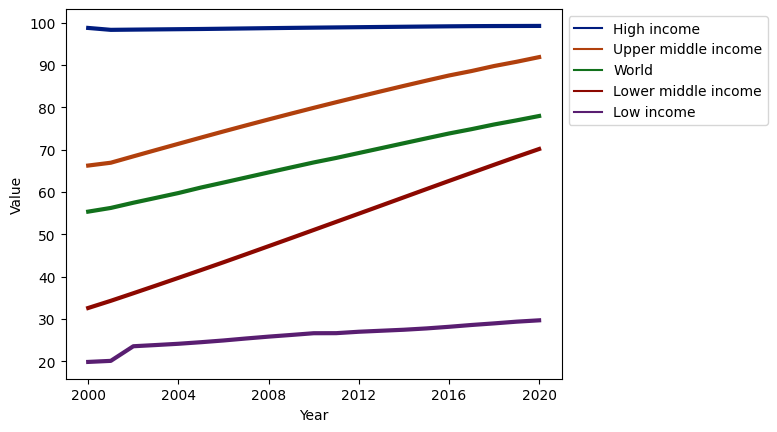

In [79]:
ax = sns.lineplot(data=income_group_df, x ='date', y = 'value',
                  hue='country.value', palette='dark',
                  legend='full', lw=3)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

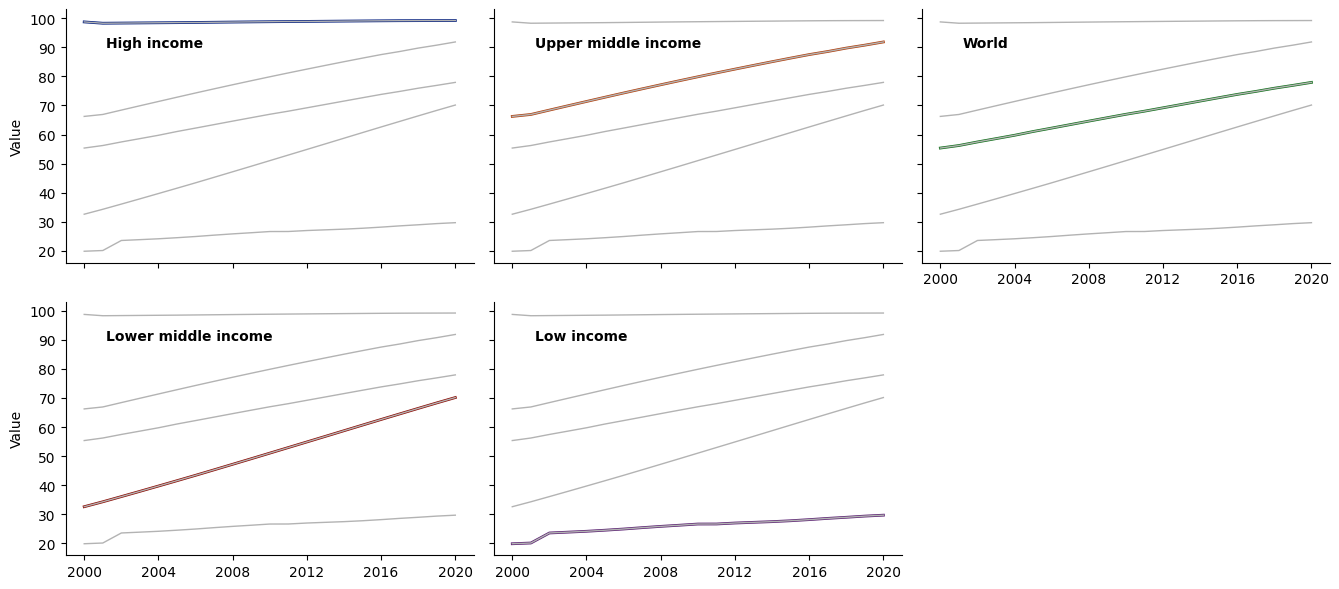

In [80]:
g = sns.relplot(data = income_group_df, x = "date", y = "value",
                col = "country.value", hue = "country.value",
                kind = "line", palette = "dark",   
                linewidth = 2, zorder = 2,
                col_wrap = 3, height = 3, aspect = 1.5, legend = False
               )

# Adding text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = income_group_df, x = "date", y = "value", units="country.value",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )
    
g.set_titles("")
g.set_axis_labels("", "Value")
g.tight_layout()

In [81]:
income_group_df[income_group_df['date']=='2000']

,index,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,page
21,13,,2000-01-01,98.719294,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XD,High income,20
83,7,,2000-01-01,19.893841,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XM,Low income,35
145,19,,2000-01-01,32.622394,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XN,Lower middle income,36
207,35,,2000-01-01,66.239907,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,XT,Upper middle income,58
269,47,WLD,2000-01-01,55.364842,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,59


## Filtering by region

In [82]:
region_df = sanitation_df[sanitation_df['country.value'].isin([
    'World', 'East Asia & Pacific', 'Europe & Central Asia', 
    'Latin America & Caribbean', 'Middle East & North Africa', 
    'North America', 'South Asia', 'Sub-Saharan Africa',])].reset_index()
# From String to Categorical
region_df['country.value'] = pd.Categorical(region_df['country.value'], 
    categories=['North America', 'Europe & Central Asia', 
                'Middle East & North Africa', 'East Asia & Pacific', 
                'Latin America & Caribbean', 'World', 
                'South Asia', 'Sub-Saharan Africa'])
region_df

,index,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,page
0,22,EAS,2021-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,Z4,East Asia & Pacific,7
1,23,EAS,2020-01-01,90.855594,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,Z4,East Asia & Pacific,7
2,24,EAS,2019-01-01,89.459261,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,Z4,East Asia & Pacific,7
3,25,EAS,2018-01-01,88.187877,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,Z4,East Asia & Pacific,7
4,26,EAS,2017-01-01,86.753430,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,Z4,East Asia & Pacific,7
...,...,...,...,...,...,...,...,...,...,...,...,...
491,33,WLD,1964-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
492,34,WLD,1963-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
493,35,WLD,1962-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60
494,36,WLD,1961-01-01,NaN,,,0,SH.STA.BASS.ZS,People using at least basic sanitation service...,1W,World,60


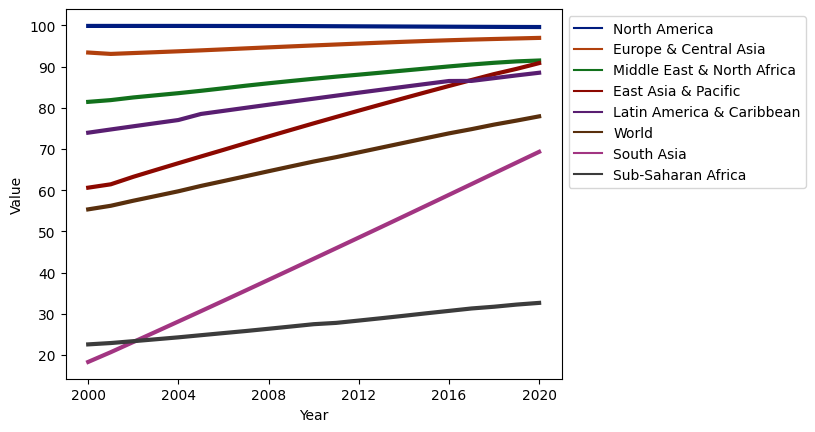

In [83]:
ax = sns.lineplot(data=region_df, x ='date', y = 'value',
                  hue='country.value', palette='dark',
                  legend='full', lw=3)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

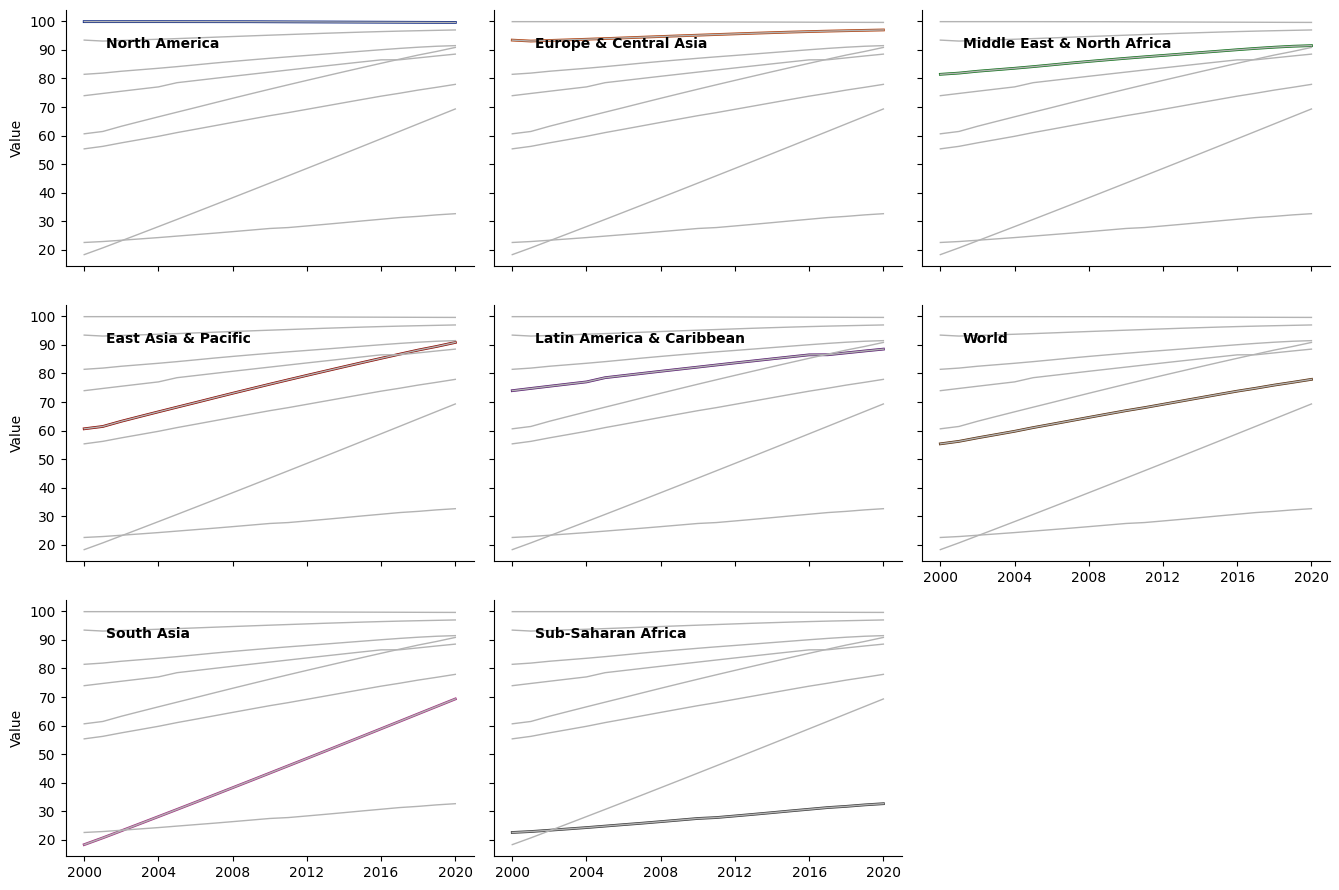

In [84]:
g = sns.relplot(data = region_df, x = "date", y = "value",
                col = "country.value", hue = "country.value",
                kind = "line", palette = "dark",   
                linewidth = 2, zorder = 2,
                col_wrap = 3, height = 3, aspect = 1.5, legend = False
               )

# Adding text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = region_df, x = "date", y = "value", units="country.value",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )
    
g.set_titles("")
g.set_axis_labels("", "Value")
g.tight_layout()

In [85]:
# World trend
region_df.loc[region_df['country.value'] == 'World', 'value'].describe()

count    21.000000
mean     66.794741
std       7.131075
min      55.364842
25%      61.052083
50%      66.973903
75%      72.663819
max      77.933408
Name: value, dtype: float64

# Conclusions

The following questions were asked regarding access to sanitation facilities over time:

- How is access to sanitation facilities changing over time?
    - The data shows that worldwide, there has been an increase in accessibility to sanitation facilities from 55% to 77% in the first two decades of this century.
- Is there an overall trend?
    - Yes, there is an overall increasing trend in access to sanitation facilities worldwide.
    - However, when looking at access by region, the rate of increase varies:
        - East Asia & Pacific and South Asia have seen a significant increase in the proportion of the population with access to sanitation facilities, with an increase of over 30 percentage points.
        - Africa and Latin America & Caribbean have seen a moderate increase of around 10 percentage points.
        - North America and Europe & Central Asia have seen a lower increase in percentage points, although their access is already above 90%.
- Does it vary by income group?
    - Yes, there is a noticeable difference in access to basic sanitation facilities between income groups.
    - High and upper-middle income countries are already above the world trend in terms of access, whereas lower-middle and low-income countries are below the world trend.
    - High-income countries already have a proportion of population with access close to 100% in this time period.
    - Upper-middle and lower-middle income countries show a similar slope over the years.
    - Low-income countries have shown a shallow slope over the years.